## Problem 2: Numpy

This problem consists of Numpy exercises. You are asked to implement a simulator for a system known as [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life).

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt # Core plotting support

def show_board(grid, title=None, **args):
    plt.matshow(grid, **args)
    if title is not None:
        plt.title(title)
    plt.show()

Matplotlib is building the font cache; this may take a moment.


**Important convention.** To pass the test cells, your Numpy array should store *integer* values. The simplest way to convert a Numpy array of any type into one with integers is to use `astype()`. For example, consider the following boolean array, `B`:

In [2]:
B = np.array([[False, True,  False],
              [False, False, True],
              [True,  True,  False]])
B

array([[False,  True, False],
       [False, False,  True],
       [ True,  True, False]])

To convert it into an array of integers, use `astype()`:

In [3]:
A = B.astype(int)
print(A)

[[0 1 0]
 [0 0 1]
 [1 1 0]]


In this case, the conversion is done using Python's default for booleans to integers (`False` goes to 0, `True` goes to 1).

## Data/test sets

Run the following code cell, which will download the missing data or solution files, if any.

In [4]:
from cse6040utils import download_all

datasets = {'board_of_life_soln2.csv': '360fade983415eb884fa6354cfcfd56d',
            'life.csv': '93a9bc33328c46e226baabdac6a88321',
            'step.csv': 'b959690bbf59fb87ab27178eeccb15b8'}

DATA_SUFFIX = "gol/"
data_paths = download_all(datasets, local_suffix=DATA_SUFFIX, url_suffix=DATA_SUFFIX)

print("\n(All data appears to be ready.)")

'board_of_life_soln2.csv' is ready!
'life.csv' is ready!
'step.csv' is ready!

(All data appears to be ready.)


## Background

In Conway's Game of Life, you have an $n \times n$ board (or grid). Let's call this board $B$. Each grid cell of the board, $b_{i,j}$, exists in one of two states: alive or dead.

Starting from some initial configuration of living and dead cells, the cells evolve in discrete time steps according to the following rules:

- **Rule 0.** If the cell is alive at time $t$ and has exactly two or three neighbors, it will remain alive at time $t+1$.
- **Rule 1.** If the cell is alive at time $t$ and has only zero or one living neighbors, it will die from loneliness at time $t+1$.
- **Rule 2.** If the cell is alive at time $t$ and has more than three living neighbors, it will die from overcrowding at time $t+1$.
- **Rule 3.** If the cell is dead at time $t$ and has exactly three living neighbors, it will come alive at $t+1$.

Note that the cell changes happen _simultaneously_. That is, the board at time $t+1$ depends only on the board configuration at time $t$.

**Example.** Suppose the board is a $3 \times 3$ grid with the following initial configuration. ("1" is alive, "0" is dead.)

      0   1   2    <-- columns
    +---+---+---+
    | 0 | 1 | 1 |  row 0
    +---+---+---+
    | 0 | 1 | 0 |  row 1
    +---+---+---+
    | 1 | 0 | 0 |  row 2
    +---+---+---+
    
At the next time step, the cell at positions (row 0, column 1) will be alive by Rule 0 because it has two living neighbors: at (0, 2) and (1, 1). Similarly, the cells at (1, 1) and (0, 2) will remain alive. However, the cell at (2, 0) will die from lonelieness by Rule 1. As for the currently dead cells, only (1, 0) and (1, 2) have exactly three neighbors, so by Rule 3 they will be resurrected at the next time step. The other dead cells will stay dead. Thus, the final configuration is as follows:

      0   1   2    <-- columns
    +---+---+---+
    | 0 | 1 | 1 |  row 0
    +---+---+---+
    | 1 | 1 | 1 |  row 1
    +---+---+---+
    | 0 | 0 | 0 |  row 2
    +---+---+---+
    
If you were to evolve this new configuration, Rule 2 would come into play since the cell at (1, 1) has four living neighbors, and so it would have to die from overcrowding in the next time step.

# Exercises

The initial configuration of live cells are stored in a comma-separated values (CSV) file. Only the coordinates of live cells are stored in this file. Here is what the file looks like, when read in and stored as a Pandas dataframe.

In [5]:
board_coords = pd.read_csv(data_paths['life.csv'])
board_coords.head()

,x,y
0,4,5
1,4,6
2,4,7
3,5,5
4,6,5


**Exercise 0** (2 points). Implement a function to convert a coordinates dataframe, like the one shown above, into a dense 2-D array that represents the grid.

The function has the signature,

```python
    def make_board(coords_df, n):
        ...
```

where `coords_df` is a dataframe with `'x'` and `'y'` columns corresponding to the row and column coordinates of a living cell, and `n` is the dimension of the board (i.e., the board is of size `n`-by-`n`).

This function should return an `n`-by-`n` Numpy array of 0 and 1 values, where 1 means "alive" and 0 means dead. Per the note above, be sure its entries are of integer type.

For example, suppose you call your function on the above dataframe as follows.

```python
    board = make_board(board_coords)
```

Then `board` should have `board[4][5] == 1`, `board[4][6] == 1`, `board[4][7] == 1`, `board[5][5] == 1`, etc.

In [6]:
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix

def make_board(coords_df, n=50):
    ###
    dense_array = np.zeros((n,n))
    
    for index, row in coords_df.iterrows():
        x = row['x']
        y = row['y']
        dense_array[x,y] = 1
        
    return dense_array
    ###

board_of_life = make_board(board_coords)
print("Board dimensions:", board_of_life.shape)
print("\nUpper 10x20 corner:\n", board_of_life[:10, :20])

Board dimensions: (50, 50)

Upper 10x20 corner:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]]


In [7]:
# Test cell: `make_board_test`

if False:
    np.savetxt("board_of_life_soln2.csv", board_of_life, fmt="%d", delimiter=",")

board_of_life_soln = np.loadtxt(data_paths["board_of_life_soln2.csv"], delimiter=",", dtype=int)
compare_boards = (board_of_life == board_of_life_soln)
mismatches_coords = np.where(compare_boards == False)
mismatches_df = pd.DataFrame(np.array([mismatches_coords[0], mismatches_coords[1]]).T, columns=['x', 'y'])
if len(mismatches_df) > 0:
    display(mismatches_df)
    assert False, "Your solution does not match the instructor solution at these following positions."

print("\n(Passed!)") 


(Passed!)


To aid our debugging, here is a convenience function for displaying the board as a graphic image. Depending on your system, purple or blue cells represent zeros; yellow or red cells represent ones.

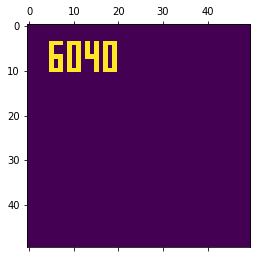

In [8]:
show_board(board_of_life)

**Exercise 1** (3 points). Implement a function that counts the number of living neighbors for each cell. The function should have the signature,

```python
    def count_living_neighbors(board):
        ...
```

It should return a new 2-D Numpy array of the same size as `board`. However, this array should contain a count of living neighbors at each position `(i, j)`. For example, suppose the board is the following:

      0   1   2    <-- columns
    +---+---+---+
    | 0 | 1 | 1 |  row 0
    +---+---+---+
    | 0 | 1 | 0 |  row 1
    +---+---+---+
    | 1 | 0 | 0 |  row 2
    +---+---+---+

Then `count_living_neighbors()` should return the following Numpy array:

      0   1   2    <-- columns
    +---+---+---+
    | 2 | 2 | 2 |  row 0
    +---+---+---+
    | 3 | 3 | 3 |  row 1
    +---+---+---+
    | 1 | 2 | 1 |  row 2
    +---+---+---+
    
To help you get started, the code below initializes an output board. Your task is to figure out how to update it to count the neighbors of every cell. You may assume the board is square and of size 3 x 3 or larger.

In [9]:
def count_living_neighbors(board):
    assert board.shape[0] == board.shape[1], "`board` must be square."
    assert board.shape[0] >= 3, "`board` must be at least 3 x 3."

    # Initialize a count array of the same shape as the board
    count = np.zeros(board.shape, dtype=int)

    # Define the relative positions of the 8 neighbors
    neighbor_positions = [(-1, -1), (-1, 0), (-1, 1),  # Upper row
                          (0, -1),           (0, 1),   # Same row
                          (1, -1), (1, 0), (1, 1)]    # Lower row
    
    n = board.shape[0]  # Since the board is square, this is both the number of rows and columns

    # Iterate over each cell in the board
    for row in range(n):
        for col in range(n):
            # For each cell, count its living neighbors
            live_neighbors = 0
            for dr, dc in neighbor_positions:
                r, c = row + dr, col + dc
                # Check if the neighbor is within the array bounds
                if 0 <= r < n and 0 <= c < n:
                    live_neighbors += board[r, c]
            
            # Assign the count of live neighbors to the count array
            count[row, col] = live_neighbors

    return count

demo_board = np.array([[0, 1, 1],
                       [0, 1, 0],
                       [1, 0, 0]])
print("==> Demo board:\n{}".format(demo_board))
print("\n==> Counts:\n{}".format(count_living_neighbors(demo_board)))

==> Demo board:
[[0 1 1]
 [0 1 0]
 [1 0 0]]

==> Counts:
[[2 2 2]
 [3 3 3]
 [1 2 1]]


In [10]:
# Test cell: `count_living_neighbors_test1`

your_demo_count = count_living_neighbors(demo_board)
demo_count_soln = np.array([[2, 2, 2],
                            [3, 3, 3],
                            [1, 2, 1]])

assert type(your_demo_count) is np.ndarray, "Your function needs to return an Numpy array."
assert your_demo_count.shape == demo_count_soln.shape, \
       "Your counts have the wrong shape: it's {} instead of {}.".format(your_demo_count.shape,
                                                                         demo_count_soln.shape)
    
assert your_demo_count.dtype == 'int64', \
       "Make sure your count array has integer elements (they appear to be {} instead).".format(your_demo_count.dtype)

matches = (your_demo_count == demo_count_soln)
assert matches.all(), \
       "Counts for `demo_board` does not match expected counts, which are\n==>\n{}".format(demo_count_soln)

print("\n(Passed, part 1.)")


(Passed, part 1.)


In [11]:
# Test cell: `count_living_neighbors_test2`

board_of_life_counts = count_living_neighbors(board_of_life)
assert board_of_life_counts.shape == board_of_life.shape, \
       "Counts shape, {}, does not match original board, {}.".format(board_of_life_count.shape,
                                                                     board_of_life.shape)

from numpy.random import choice
for i in choice(board_of_life.shape[0], replace=False, size=7):
    ii_range = range(max(0, i-1), min(board_of_life.shape[0], i+2)) 
    for j in choice(board_of_life.shape[1], replace=False, size=7):
        jj_range = range(max(0, j-1), min(board_of_life.shape[1], j+2))
        your_count = board_of_life_counts[i][j]
        true_count = 0
        for ii in ii_range:
            for jj in jj_range:
                if not (ii == i and jj == j):
                    true_count += int(board_of_life[ii, jj])
                    
        err_msg = "Your count at {} should be {} but is instead {}. Check the neighborhood:\n==> {}"
        ij_neighborhood = board_of_life[min(ii_range):max(ii_range)+1, min(jj_range):max(jj_range)+1]
        assert your_count == true_count, \
               err_msg.format((i, j), true_count, your_count, ij_neighborhood)

print("\n(Passed, part 2.)")


(Passed, part 2.)


Recall the rules of the game:
- **Rule 0.** If the cell is alive at time $t$ and has exactly two or three neighbors, it will remain alive at time $t+1$.
- **Rule 1.** If the cell is alive at time $t$ and has only zero or one living neighbors, it will die from loneliness at time $t+1$.
- **Rule 2.** If the cell is alive at time $t$ and has more than three living neighbors, it will die from overcrowding at time $t+1$.
- **Rule 3.** If the cell is dead at time $t$ and has exactly three living neighbors, it will come alive at $t+1$.

**Exercise 2** (4 point). Suppose you are given a board at time $t$. Compute the board at time $t+1$, according to the rules above.

You should specifically complete the function,

```python
    def step(board):
        ...
```

It should return the new board after applying the four rules. To help you out, we've implemented the first rule (Rule 0).

For example, given this `board`,

      0   1   2    <-- columns
    +---+---+---+
    | 0 | 1 | 1 |  row 0
    +---+---+---+
    | 0 | 1 | 0 |  row 1
    +---+---+---+
    | 1 | 0 | 0 |  row 2
    +---+---+---+

your function should return this board:

      0   1   2    <-- columns
    +---+---+---+
    | 0 | 1 | 1 |  row 0
    +---+---+---+
    | 1 | 1 | 1 |  row 1
    +---+---+---+
    | 0 | 0 | 0 |  row 2
    +---+---+---+

> _Hint_: Boolean operations can help simplify the logic and checking for this problem:
>
> ```python
>     # Boolean "and"
>     assert (0 & 0) == 0  # Also: (False and False) == False
>     assert (0 & 1) == 0  #       (False and True) == True
>     assert (1 & 0) == 0  #       (True and False) == True
>     assert (1 & 1) == 1  #       (True and True) == True
>
>     # Boolean "or"
>     assert (0 | 0) == 0
>     assert (0 | 1) == 1
>     assert (1 | 0) == 1
>     assert (1 | 1) == 1
>
>     # Boolean "exclusive-or." Same as "not equal"
>     assert (0 ^ 0) == 0
>     assert (0 ^ 1) == 1
>     assert (1 ^ 0) == 1
>     assert (1 ^ 1) == 0
>
>     # Boolean "not"
>     np.logical_not(0) == True  # np.logical_not(0).astype(int) == 1
>     np.logical_not(1) == False # np.logical_not(1).astype(int) == 0
> ```

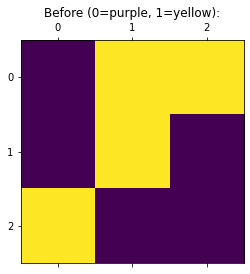

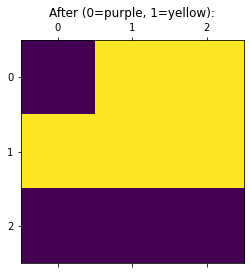

In [12]:
def step(board):
    board = board.astype(int)
    def not_array(x):
        return np.logical_not(x).astype(x.dtype)
    
    counts = count_living_neighbors(board)
    new_board = board.copy()
    # Rule 0. Alive with two or three neighbors ==> lives.
    new_board |= board & ((counts == 2) | (counts == 3))
    
    # Rule 1. Alive with fewer than two living neighbors ==> dies from loneliness.
    new_board &= not_array((board == 1) & (counts < 2))
    
    # Rule 2. Alive with more than three living neighbors ==> dies from overcrowding.
    new_board &= not_array((board == 1) & (counts > 3))
    
    # Rule 3. Dead with exactly three living neighbors ==> becomes alive.
    new_board |= not_array(board) & (counts == 3)
    
    return new_board
    

show_board(demo_board, title='Before (0=purple, 1=yellow):')

new_demo_board = step(demo_board)
show_board(new_demo_board, title = 'After (0=purple, 1=yellow):')

In [13]:
# Test cell: `step_test1`

assert (new_demo_board == np.array([[0, 1, 1],
                                    [1, 1, 1],
                                    [0, 0, 0]])).all()

print("\n(Passed, part 1.)")


(Passed, part 1.)


In [14]:
# Test cell: `step_test2`

step_soln = np.loadtxt(data_paths['step.csv'], delimiter=',', dtype=int)
your_step = step(board_of_life)

matches = (your_step == step_soln)
if not matches.all():
    print("*** Detected mismatches. ***")
    mismatches = np.where(~matches)
    for i, j in zip(mismatches[0], mismatches[1]):
        print("({}, {}) was {} instead of {}.".format(i, j, your_step[i, j], step_soln[i, j]))
    assert False
    
print("\n(Passed!)")


(Passed!)


### Full simulation

The following code creates a widget that allows you to step through many iterations of the game. There is nothing to write here; it's just for your edification to see that you've completed a working implementation. The initial "6040" pattern from above will eventually converge to a repeating pattern.

In [15]:
MAX_STEPS = 75
N = board_of_life.shape[0]
all_boards = np.zeros((N, N, MAX_STEPS), dtype=int)

all_boards[:, :, 0] = board_of_life
for t in range(1, MAX_STEPS):
    all_boards[:, :, t] = step(all_boards[:, :, t-1])
    
def display_board(t=0):
    show_board(all_boards[:, :, t])

from ipywidgets import interact, IntSlider
interact(display_board, t=IntSlider(value=0, min=0, max=MAX_STEPS-1, step=1, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=74), Output()), _dom_cl…

**Fin!**